Анализ данных Titanic

Подготовка данных 

In [1]:
import pandas as pd

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')


In [3]:
df = pd.concat([train_df, test_df], ignore_index=True)

In [4]:
df['Survived'] = df['Survived'].astype('category')
df['Pclass'] = df['Pclass'].astype('category')
df['Sex'] = df['Sex'].astype('category')

Анализ Таблицы

In [5]:
print(df.describe())

       PassengerId          Age        SibSp        Parch         Fare
count  1309.000000  1046.000000  1309.000000  1309.000000  1308.000000
mean    655.000000    29.881138     0.498854     0.385027    33.295479
std     378.020061    14.413493     1.041658     0.865560    51.758668
min       1.000000     0.170000     0.000000     0.000000     0.000000
25%     328.000000    21.000000     0.000000     0.000000     7.895800
50%     655.000000    28.000000     0.000000     0.000000    14.454200
75%     982.000000    39.000000     1.000000     0.000000    31.275000
max    1309.000000    80.000000     8.000000     9.000000   512.329200


In [6]:
most_passengers_class = df['Pclass'].value_counts().idxmax()
print(f"Больше всего пассажиров было в классе: {most_passengers_class}")

Больше всего пассажиров было в классе: 3


In [7]:
grouped_df = df.groupby(['Pclass', 'Sex'])['Age'].mean()
print(grouped_df)

Pclass  Sex   
1       female    37.037594
        male      41.029272
2       female    27.499223
        male      30.815380
3       female    22.185329
        male      25.962264
Name: Age, dtype: float64


C:\Users\kirya\AppData\Local\Temp\ipykernel_24672\2665393010.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = df.groupby(['Pclass', 'Sex'])['Age'].mean()


In [8]:
youngest = grouped_df.idxmin()
oldest = grouped_df.idxmax()
age_difference = grouped_df.max() - grouped_df.min()

print(f"Самый юный: {youngest}, средний возраст: {grouped_df.min():.2f}")
print(f"Самый взрослый: {oldest}, средний возраст: {grouped_df.max():.2f}")
print(f"Разница в возрасте: {age_difference:.2f}")

Самый юный: (np.int64(3), 'female'), средний возраст: 22.19
Самый взрослый: (np.int64(1), 'male'), средний возраст: 41.03
Разница в возрасте: 18.84


In [9]:
survivors_k = df[df['Survived'] == 1][df['Name'].str.startswith('K')].sort_values(by='Fare', ascending=False)
print(survivors_k)

     PassengerId Survived Pclass                                      Name  \
621          622      1.0      1              Kimball, Mr. Edwin Nelson Jr   
457          458      1.0      1         Kenyon, Mrs. Frederick R (Marion)   
316          317      1.0      2       Kantor, Mrs. Sinai (Miriam Sternin)   
184          185      1.0      3       Kink-Heilmann, Miss. Luise Gretchen   
706          707      1.0      2             Kelly, Mrs. Florence "Fannie"   
691          692      1.0      3                        Karun, Miss. Manca   
303          304      1.0      2                       Keane, Miss. Nora A   
300          301      1.0      3  Kelly, Miss. Anna Katherine "Annie Kate"   
573          574      1.0      3                         Kelly, Miss. Mary   

        Sex   Age  SibSp  Parch  Ticket     Fare Cabin Embarked  
621    male  42.0      1      0   11753  52.5542   D19        S  
457  female   NaN      1      0   17464  51.8625   D21        S  
316  female  24.0    

C:\Users\kirya\AppData\Local\Temp\ipykernel_24672\3308503538.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  survivors_k = df[df['Survived'] == 1][df['Name'].str.startswith('K')].sort_values(by='Fare', ascending=False)


In [10]:
max_relatives = df['SibSp'].max() + df['Parch'].max()
print(f"Максимальное количество родных: {max_relatives}")

Максимальное количество родных: 17


In [11]:
mean_fare_cabin = df[df['Cabin'].notna()]['Fare'].mean()
mean_fare_no_cabin = df[df['Cabin'].isna()]['Fare'].mean()
fare_ratio = mean_fare_cabin / mean_fare_no_cabin
print(f"Средняя стоимость билета с указанной каютой: {mean_fare_cabin:.1f}")
print(f"Средняя стоимость билета без указанной каюты: {mean_fare_no_cabin:.1f}")
print(f"Отношение стоимости билетов: {fare_ratio:.1f}")

Средняя стоимость билета с указанной каютой: 81.9
Средняя стоимость билета без указанной каюты: 19.1
Отношение стоимости билетов: 4.3


Визуализация 

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

Scatter plot

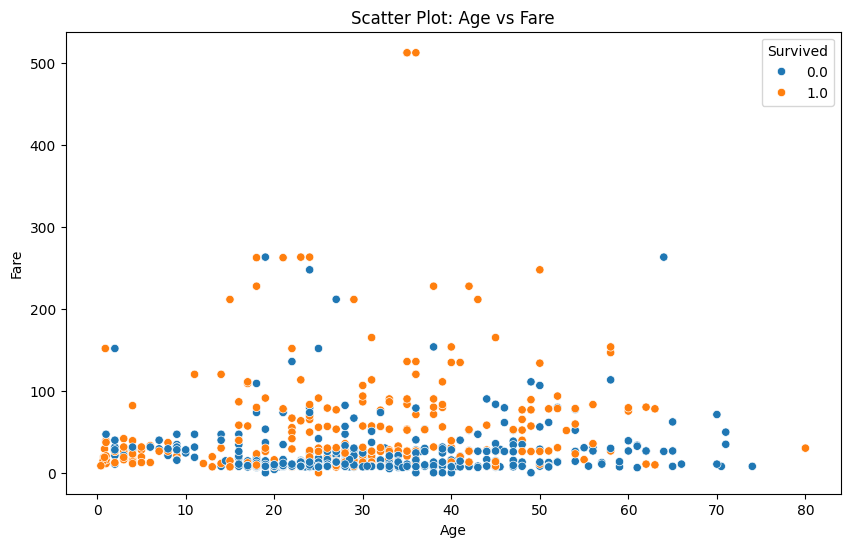

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df)
plt.title("Scatter Plot: Age vs Fare")
plt.show()

Linear plot (with several lines)

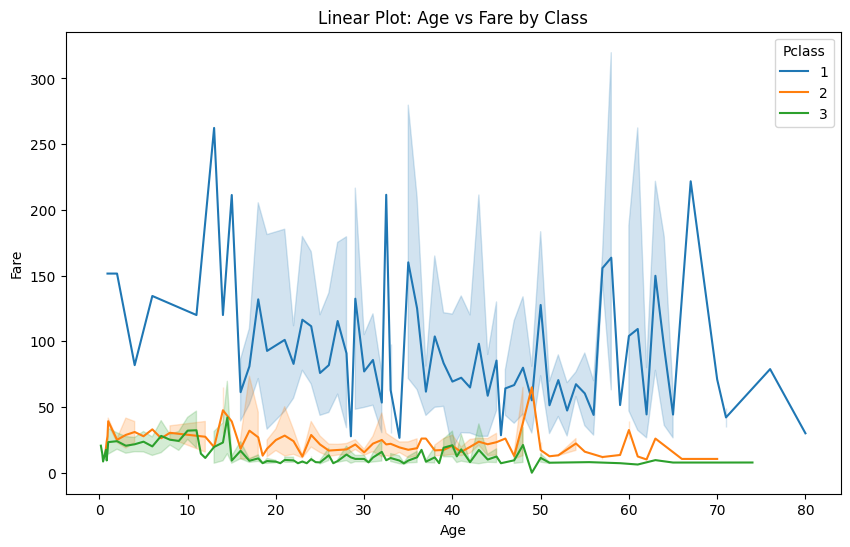

In [14]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Age', y='Fare', hue='Pclass', data=df)
plt.title("Linear Plot: Age vs Fare by Class")
plt.show()

Histogram

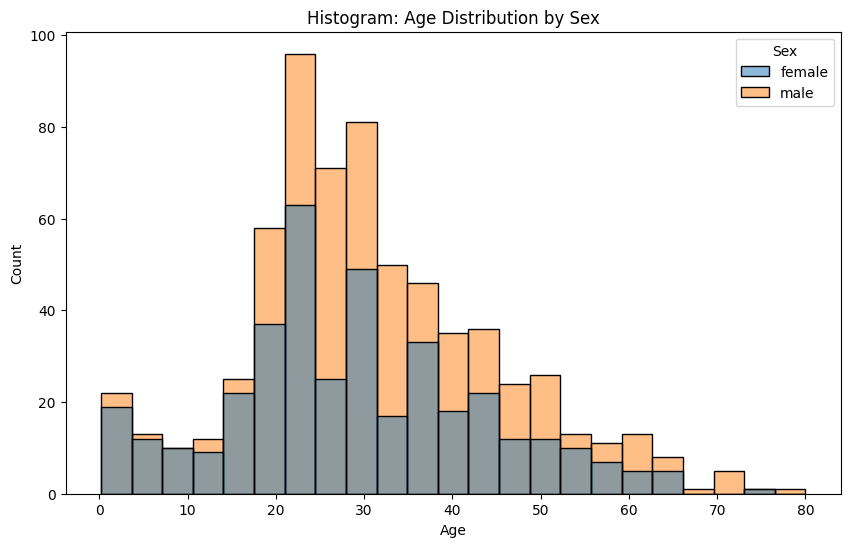

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(x='Age', hue='Sex', data=df)
plt.title("Histogram: Age Distribution by Sex")
plt.show()

Bar chart

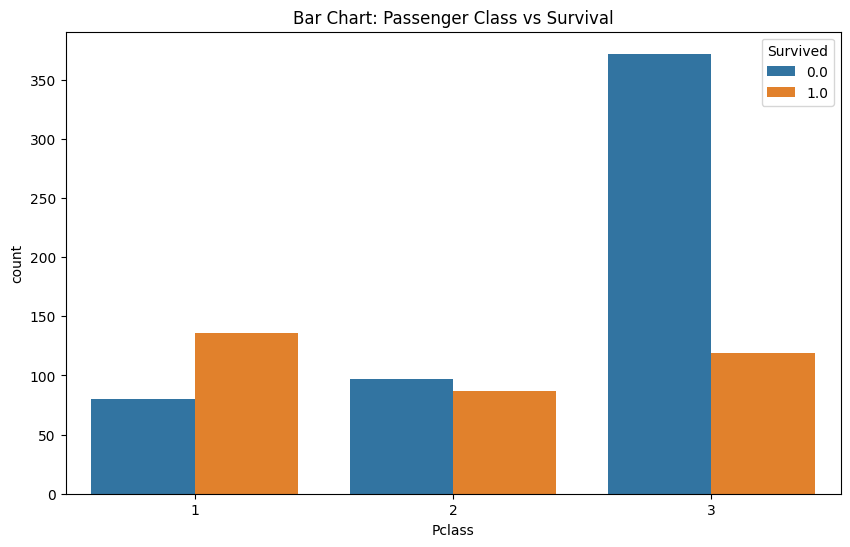

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title("Bar Chart: Passenger Class vs Survival")
plt.show()

Horizontal bar chart

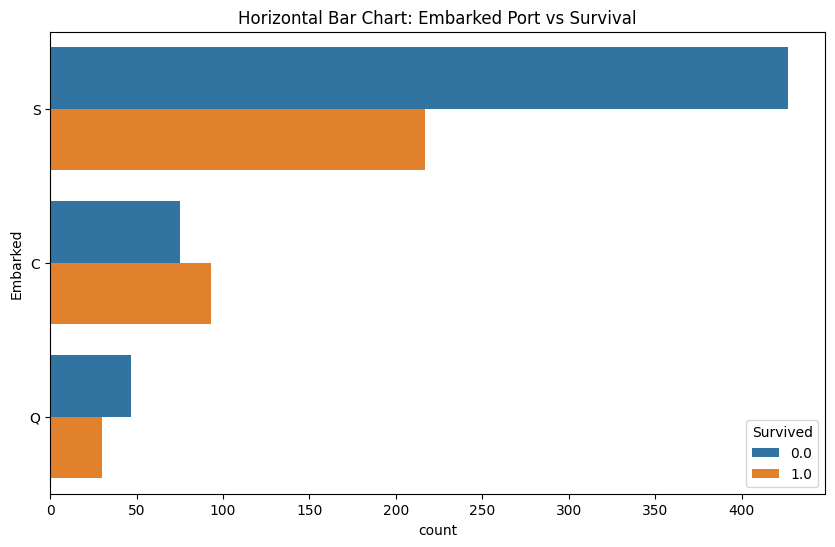

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Embarked', hue='Survived', data=df)
plt.title("Horizontal Bar Chart: Embarked Port vs Survival")
plt.show()

Pie chart

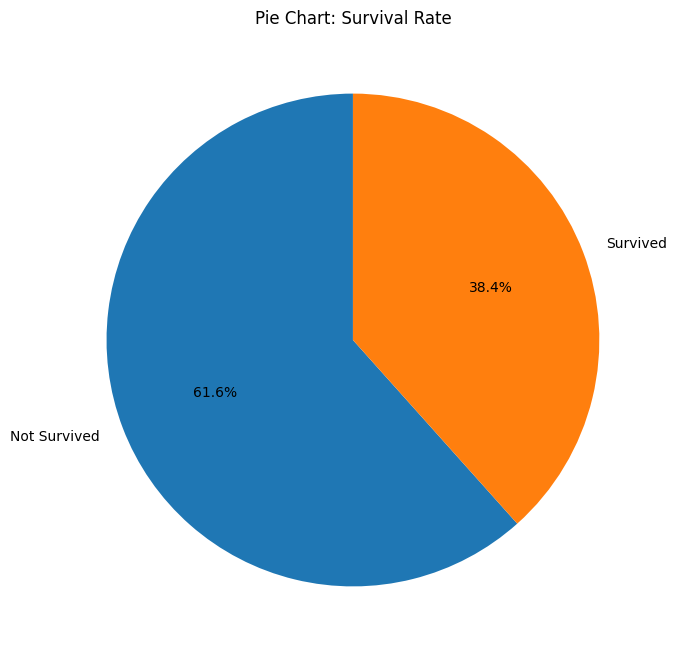

In [18]:
plt.figure(figsize=(8, 8))
plt.pie(df['Survived'].value_counts(), labels=['Not Survived', 'Survived'], autopct='%1.1f%%', startangle=90)
plt.title("Pie Chart: Survival Rate")
plt.show()

Box chart

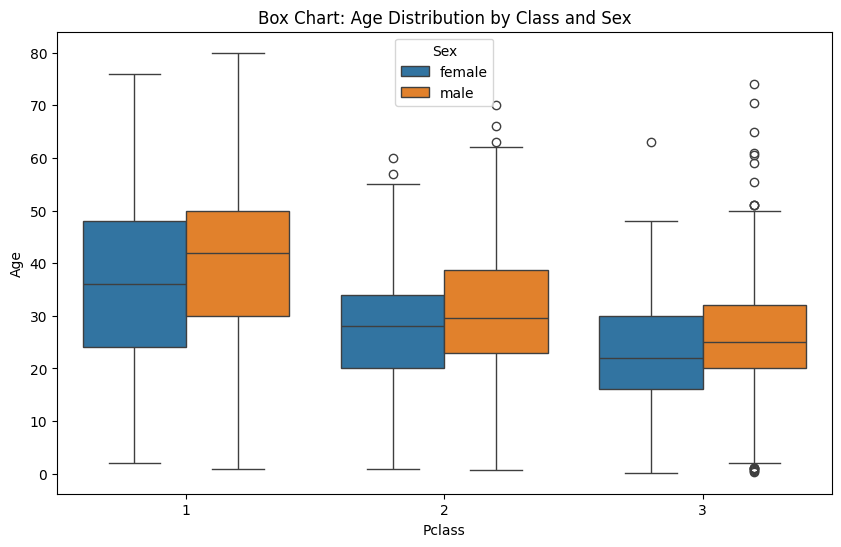

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Age', hue='Sex', data=df)
plt.title("Box Chart: Age Distribution by Class and Sex")
plt.show()

Sunburst chart

In [20]:
import plotly.express as px
df_no_nan = df.dropna(subset=['Pclass', 'Sex', 'Embarked', 'Survived'])  

fig = px.sunburst(df_no_nan, path=['Pclass', 'Sex', 'Embarked', 'Survived'], values='Fare',
                 title='Sunburst: Fare by Pclass, Sex, Embarked, and Survival')

fig.show()

d:\python_test\spbu-python-course\venv\Lib\site-packages\plotly\express\_core.py:1727: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dfg = df.groupby(path[i:]).agg(agg_f)
d:\python_test\spbu-python-course\venv\Lib\site-packages\plotly\express\_core.py:1727: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dfg = df.groupby(path[i:]).agg(agg_f)
d:\python_test\spbu-python-course\venv\Lib\site-packages\plotly\express\_core.py:1727: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to ad

3D Scatter plot

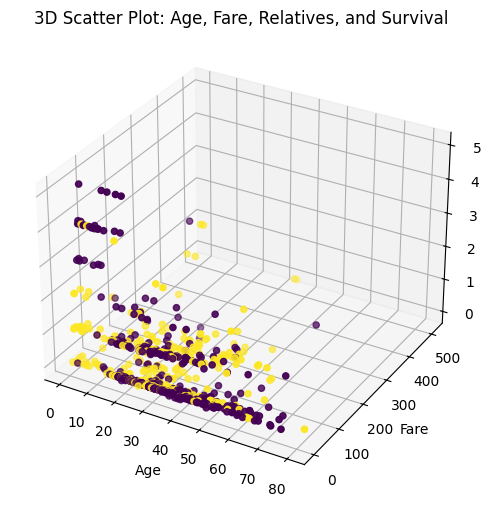

In [21]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Age'], df['Fare'], df['SibSp'], c=df['Survived'], cmap='viridis')
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
ax.set_zlabel('Relatives')
plt.title("3D Scatter Plot: Age, Fare, Relatives, and Survival")
plt.show()